# Global Solutions - Machine Learning for Data Science

### Gabriel de Oliveira Antoniette   RM99854
### Leandro Dias Vieira              RM550997
### Lucas Paes Landim Pereira        RM550349

----------------------------------------
------------------------
----------------------

# Importando os dados

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [102]:
cidades = pd.read_csv('datasets/Cities1.csv')
continentes = pd.read_csv('datasets/continents.csv - Página2.csv')

# Visualizando os dados

In [103]:
cidades.isnull().sum()

City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
dtype: int64

In [104]:
cidades.head()

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435


--------------------------------------------------------------------------------------------------------------------------------------------------------

In [105]:
continentes.isnull().sum()

Country      0
Continent    0
dtype: int64

In [106]:
continentes.head()

,Country,Continent
0,Egypt,Africa
1,Cote d'Ivoire,Africa
2,South Sudan,Africa
3,Tanzania,Africa
4,Sudan,Africa


# Concatenando (Juntando) os DataFrames 

In [107]:
df_concatenado = pd.merge(cidades, continentes, on = 'Country', how= 'left')

df_concatenado.head()

,City,Region,Country,AirQuality,WaterPollution,Continent
0,New York City,New York,United States of America,46.816038,49.504950,North America
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,North America
2,San Francisco,California,United States of America,60.514019,43.000000,North America
3,Berlin,NaN,Germany,62.364130,28.612717,Europe
4,Los Angeles,California,United States of America,36.621622,61.299435,North America


# Pré-processamento dos dados

In [108]:
df_final = pd.get_dummies(df_concatenado, columns= ['Continent'], prefix = '', prefix_sep = '', dtype= int)
df_final.head()

,City,Region,Country,AirQuality,WaterPollution,Africa,Asia,Central America,Europe,Middle East,North America,Oceania,South America
0,New York City,New York,United States of America,46.816038,49.504950,0,0,0,0,0,1,0,0
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,0,0,0,0,0,1,0,0
2,San Francisco,California,United States of America,60.514019,43.000000,0,0,0,0,0,1,0,0
3,Berlin,NaN,Germany,62.364130,28.612717,0,0,0,1,0,0,0,0
4,Los Angeles,California,United States of America,36.621622,61.299435,0,0,0,0,0,1,0,0


In [109]:
df_final['Africa'].value_counts()

Africa
0    3739
1     224
Name: count, dtype: int64

In [110]:
contagem_continentes = df_final[['South America', 'Europe', 'Asia', 'Africa', 
                                 'Central America', 'North America', 'Oceania', 'Middle East']].sum()
print(contagem_continentes)

South America       249
Europe             1269
Asia                750
Africa              224
Central America      49
North America      1045
Oceania             204
Middle East         173
dtype: int64


## Dropando as colunas

In [111]:
df_final.drop(columns = ['Region', 'Country', 'City'], inplace= True)

In [112]:
df_final.isnull().sum()

AirQuality         0
WaterPollution     0
Africa             0
Asia               0
Central America    0
Europe             0
Middle East        0
North America      0
Oceania            0
South America      0
dtype: int64

## Matriz de Correlação

In [113]:
matriz_correlacao = df_final.corr()

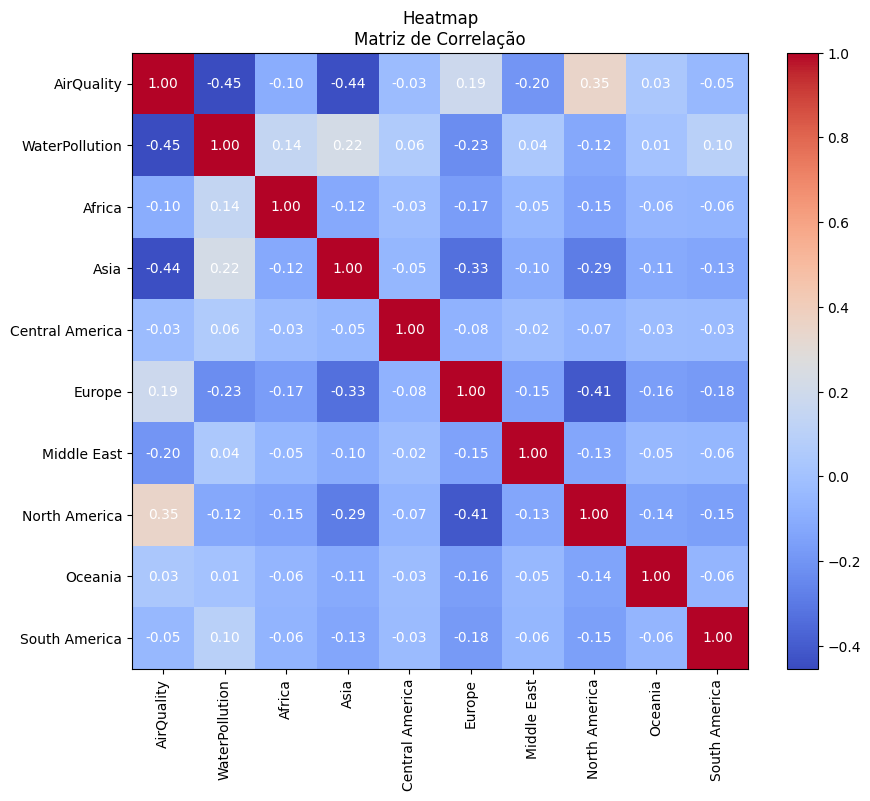

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 8))
plt.imshow(matriz_correlacao, cmap = 'coolwarm', interpolation = 'nearest')
plt.colorbar()

plt.xticks(range(len(matriz_correlacao.columns)), matriz_correlacao.columns, # type: ignore
           rotation = 90)

plt.yticks(range(len(matriz_correlacao.columns)), matriz_correlacao.columns) # type: ignore


plt.title('Heatmap\nMatriz de Correlação')

for i in range(len(matriz_correlacao.columns)):
    for j in range(len(matriz_correlacao.columns)):
        plt.text(j, i, f'{matriz_correlacao.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()        

# Criando e Testando os Modelos

## Regressão Linear

In [115]:
# Separando os dados em conjuntos de treino e teste
X = df_final[['AirQuality', 'South America', 'Europe', 'Asia', 'Africa', 'Central America', 'North America', 'Oceania', 'Middle East']]
y = df_final["WaterPollution"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)
score_linear = r2_score(y_test, y_pred_linear)
print(f"R² da Regressão Linear: {score_linear}")

R² da Regressão Linear: 0.27171385835870343


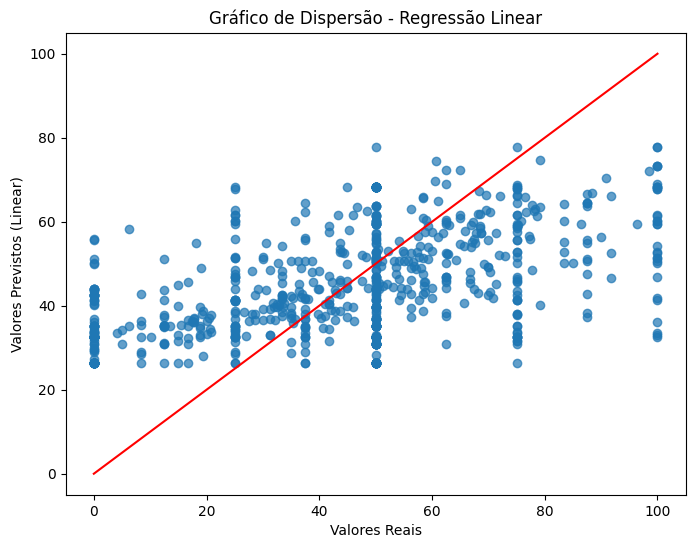

In [116]:
# Gráfico de dispersão da Regressão Linear
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Linha de referência
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos (Linear)")
plt.title("Gráfico de Dispersão - Regressão Linear")
plt.show()

## Regressão Polinomial

In [117]:
# Regressão Polinomial (com grau 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_polynomial = model_poly.predict(X_test_poly)
score_polynomial = r2_score(y_test, y_pred_polynomial)
print(f"R² da Regressão Polinomial: {score_polynomial}")

R² da Regressão Polinomial: 0.2861948572022057


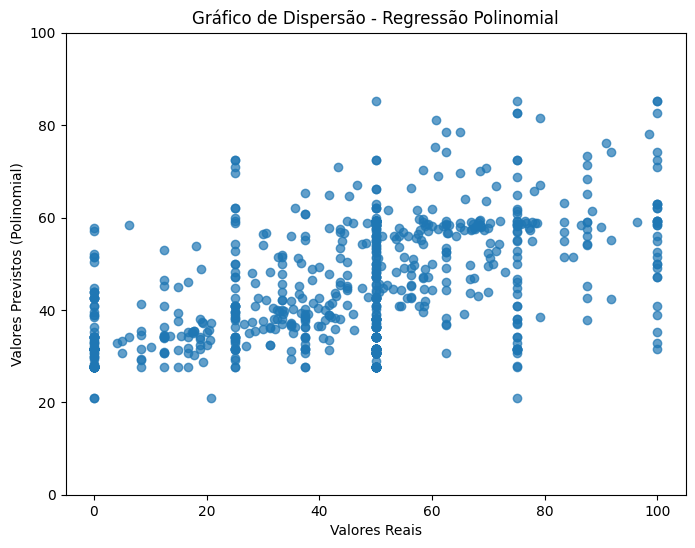

In [118]:
# Gráfico de dispersão da Regressão Polinomial
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_polynomial, alpha=0.7)

plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos (Polinomial)")

# Define os limites dos eixos
plt.ylim(0, 100)  # Define o limite do eixo y de 0 a 100

plt.title("Gráfico de Dispersão - Regressão Polinomial")
plt.show()

# Questões:

### 1- Considerando um nível de significância de 10%, foi encontrada significância estatística no coeficiente de algum regressor da regressão linear? Qual? 

In [119]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          7.08e-178
Time:                        10:46:26   Log-Likelihood:                -14342.
No. Observations:                3170   AIC:                         2.870e+04
Df Residuals:                    3161   BIC:                         2.876e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              61.7189      0.961     

Com base nesse resultado, podemos concluir com 90% de confiança que os regressores AirQuality, South America, Asia, Africa, Central America, North America e Oceania têm um efeito significativo na variável dependente `"Water Pollution"`.

Apenas a Europa com p-valor de 0.951 (maior que 0.10) deu como `NÃO SIGNIFICATIVO`

### 2- O que o cientista de dados deve entender quando não há significância estatística no coeficiente de algum regressor? 

Ausência de evidência NÃO é evidência de ausência.
 
A falta de significância estatística não significa necessariamente que a variável não tenha nenhum efeito, mas sim que, com os dados disponíveis, não temos evidências suficientes para afirmar que o efeito existe.


Possíveis motivos para a falta de significância:

`Baixo poder estatístico:` O tamanho da amostra pode ser insuficiente para detectar um efeito real.

`Alta variabilidade nos dados:` A variabilidade natural dos dados pode estar mascarando um efeito real.

`Multicolinearidade:` A alta correlação entre variáveis independentes pode tornar difícil isolar o efeito individual de cada uma.

`Especificação incorreta do modelo e a variável realmente não é um preditor:` A variável pode realmente não ter relação com a variável dependente.

****************************************************************************************************************************

--------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------

### 3- Considerando um nível de significância de 10% o teste-f da regressão linear rejeita ou aceita a hipótese nula?
### Lembrando que a hipótese nula estabelece que não há diferença estatisticamente significativa no modelo usando-se somente o intercepto e no modelo com os coeficientes calculados.

In [120]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          7.08e-178
Time:                        10:46:26   Log-Likelihood:                -14342.
No. Observations:                3170   AIC:                         2.870e+04
Df Residuals:                    3161   BIC:                         2.876e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              61.7189      0.961     

Considerando um nível de significância de 10 % (alfa = 0.10), o valor-p (7.08e-178) é muito menor que o alfa.
Portanto, rejeitamos a hipótese nula.

Meus regressores, em conjunto, têm um poder preditivo estatisticamente significativo.

**************************



******************


********************

### 4- Bônus: desconsiderando a significância estatística dos regressores, qual coeficiente utilizado no modelo tem maior impacto para explicar a variável de interesse?

In [121]:
results.params

const              61.718921
AirQuality         -0.352491
South America      11.481719
Europe             -0.055519
Asia                6.476259
Africa             15.970090
Central America    14.953530
North America       6.032950
Oceania             7.260581
Middle East        -0.400689
dtype: float64

Maior impacto: Africa com `15.9701` tem o maior coeficiente em valor absoluto, sugerindo um impacto potencialmente maior.

Africa tem coeficiente positivo indicando que um aumento nessas variável está associado a um aumento na variável dependente `WaterPollution`